In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [3]:
trades = ['ASBESTOS', 'CARPENTER', 'CONSTRUCTOR', 'DIVER', 'DRIVER', 'ELECTRICIAN', 'ENGINEER', 'EQUIP_OPERATOR',
          'GLAZIER', 'HVAC', 'INSULATOR', 'IRONWORKER', 'LABORER', 'LINEMAN', 'LOADER', 'MAINTENANCE', 'MASONRY',
          'MILLWRIGHT', 'PAINTER', 'PILOT', 'PIPEFITTER', 'PLUMBER', 'RAKER', 'ROLLER', 'ROOFER', 
          'TECHNICIAN'] 
# excluded OILER and TRAILERS from the analysis because they have zero hours worked

temp = pd.read_csv('WorkforceUtilization_By_Trade/WorkforceUtilizationReport-ASBESTOS.csv')
column_names = temp.columns.values.tolist()

big = pd.DataFrame(columns=column_names)

for t in trades:
    filename = 'WorkforceUtilization_By_Trade/WorkforceUtilizationReport-' + t + '.csv'
    df = pd.read_csv(filename)
    big = pd.concat([big, df], join='inner')

In [4]:
trades_list = big['CONSTRUCTION_TRADE'].unique()

trade_groups = big.groupby(big.CONSTRUCTION_TRADE)

summary = pd.DataFrame(columns=['TRADE', 'CAUCASIAN', 'AFRICAN_AMERICAN', 'HISPANIC', 'ASIAN', 'NATIVE_AMERICAN', 
                                'OTHER', 'FEMALE'])

for i in range(len(trades_list)):
    temp = trade_groups.get_group(trades_list[i])
    summary.loc[i] = [trades_list[i], "{:.0%}".format(temp['CAUCASIAN'].mean()/temp['TOTAL_EMPLOYEE'].mean()), 
                      "{:.0%}".format(temp['AFRICAN_AMERICAN'].mean()/temp['TOTAL_EMPLOYEE'].mean()), 
                      "{:.0%}".format(temp['HISPANIC'].mean()/temp['TOTAL_EMPLOYEE'].mean()),
                      "{:.0%}".format(temp['ASIAN'].mean()/temp['TOTAL_EMPLOYEE'].mean()), 
                      "{:.0%}".format(temp['NATIVE_AMERICAN'].mean()/temp['TOTAL_EMPLOYEE'].mean()),
                      "{:.0%}".format(temp['OTHER'].mean()/temp['TOTAL_EMPLOYEE'].mean()),
                     "{:.0%}".format(temp['TOTAL_FEMALE'].mean()/temp['TOTAL_EMPLOYEE'].mean())]

In [5]:
summary

,TRADE,CAUCASIAN,AFRICAN_AMERICAN,HISPANIC,ASIAN,NATIVE_AMERICAN,OTHER,FEMALE
0,ASBESTOS,29%,0%,63%,8%,0%,0%,7%
1,CARPENTER,86%,3%,9%,0%,0%,1%,2%
2,CONSTRUCTOR,99%,1%,0%,0%,0%,0%,3%
3,DIVER,0%,0%,0%,0%,0%,100%,0%
4,DRIVER,78%,2%,2%,0%,0%,18%,3%
5,ELECTRICIAN,85%,4%,9%,1%,0%,1%,3%
6,ENGINEER,86%,0%,12%,1%,0%,1%,1%
7,EQUIP_OPERATOR,84%,1%,4%,0%,0%,11%,2%
8,GLAZIER,69%,1%,30%,0%,0%,0%,3%
9,HVAC,88%,9%,3%,0%,0%,0%,5%


In [6]:
summary2 = pd.DataFrame(columns=['TRADE', 'CAUCASIAN', 'CAUCASIAN JOURNEYMEN', 'CAUCASIAN APPRENTICE',
                                 'AFRICAN_AMERICAN', 'A_A JOURNEYMEN', 'A_A APPRENTICE', 'HISPANIC', 
                                 'HISPANIC JOURNEYMEN', 'HISPANIC APPRENTICE', 'ASIAN', 'ASIAN JOURNEYMEN', 
                                 'ASIAN APPRENTICE', 'NATIVE_AMERICAN', 'N_A JOURNEYMEN', 'N_A APPRENTICE',
                                 'OTHER', 'OTHER JOURNEYMEN', 'OTHER APPRENTICE', 'FEMALE', 'FEMALE JOURNEYMEN', 
                                 'FEMALE APPRENTICE'])

levels = big.groupby([big.CONSTRUCTION_TRADE, big.CRAFT_LEVEL])

def weird_division(n, d):
    return n / d if d else 0

for i in range(len(trades_list)):
    temp = trade_groups.get_group(trades_list[i])
    a = levels.get_group((trades_list[i], 'Apprentice'))
    j = levels.get_group((trades_list[i], 'Journeymen'))
    summary2.loc[i] = [trades_list[i], "{:.0%}".format(weird_division(temp['CAUCASIAN'].sum(),temp['TOTAL_EMPLOYEE'].sum())),
                      "{:.0%}".format(weird_division(j['CAUCASIAN'].sum(),temp['CAUCASIAN'].sum())),
                      "{:.0%}".format(weird_division(a['CAUCASIAN'].sum(),temp['CAUCASIAN'].sum())),
                      "{:.0%}".format(weird_division(temp['AFRICAN_AMERICAN'].sum(),temp['TOTAL_EMPLOYEE'].sum())), 
                      "{:.0%}".format(weird_division(j['AFRICAN_AMERICAN'].sum(),temp['AFRICAN_AMERICAN'].sum())),
                      "{:.0%}".format(weird_division(a['AFRICAN_AMERICAN'].sum(),temp['AFRICAN_AMERICAN'].sum())),
                      "{:.0%}".format(weird_division(temp['HISPANIC'].sum(),temp['TOTAL_EMPLOYEE'].sum())),
                      "{:.0%}".format(weird_division(j['HISPANIC'].sum(),temp['HISPANIC'].sum())),
                      "{:.0%}".format(weird_division(a['HISPANIC'].sum(),temp['HISPANIC'].sum())),
                      "{:.0%}".format(weird_division(temp['ASIAN'].sum(),temp['TOTAL_EMPLOYEE'].sum())),
                      "{:.0%}".format(weird_division(j['ASIAN'].sum(),temp['ASIAN'].sum())),
                      "{:.0%}".format(weird_division(a['ASIAN'].sum(),temp['ASIAN'].sum())),
                      "{:.0%}".format(weird_division(temp['NATIVE_AMERICAN'].sum(),temp['TOTAL_EMPLOYEE'].sum())),
                      "{:.0%}".format(weird_division(j['NATIVE_AMERICAN'].sum(),temp['NATIVE_AMERICAN'].sum())),
                      "{:.0%}".format(weird_division(a['NATIVE_AMERICAN'].sum(),temp['NATIVE_AMERICAN'].sum())),
                      "{:.0%}".format(weird_division(temp['OTHER'].sum(),temp['TOTAL_EMPLOYEE'].sum())),
                      "{:.0%}".format(weird_division(j['OTHER'].sum(),temp['OTHER'].sum())),
                      "{:.0%}".format(weird_division(a['OTHER'].sum(),temp['OTHER'].sum())),
                      "{:.0%}".format(weird_division(temp['TOTAL_FEMALE'].sum(),temp['TOTAL_EMPLOYEE'].sum())),
                      "{:.0%}".format(weird_division(j['TOTAL_FEMALE'].sum(),temp['TOTAL_FEMALE'].sum())),
                      "{:.0%}".format(weird_division(a['TOTAL_FEMALE'].sum(),temp['TOTAL_FEMALE'].sum()))]

In [7]:
summary2

,TRADE,CAUCASIAN,CAUCASIAN JOURNEYMEN,CAUCASIAN APPRENTICE,AFRICAN_AMERICAN,A_A JOURNEYMEN,A_A APPRENTICE,HISPANIC,HISPANIC JOURNEYMEN,HISPANIC APPRENTICE,...,ASIAN APPRENTICE,NATIVE_AMERICAN,N_A JOURNEYMEN,N_A APPRENTICE,OTHER,OTHER JOURNEYMEN,OTHER APPRENTICE,FEMALE,FEMALE JOURNEYMEN,FEMALE APPRENTICE
0,ASBESTOS,29%,75%,25%,0%,100%,0%,63%,95%,5%,...,0%,0%,0%,0%,0%,0%,0%,7%,100%,0%
1,CARPENTER,86%,95%,5%,3%,65%,35%,9%,84%,16%,...,64%,0%,99%,1%,1%,98%,2%,2%,30%,70%
2,CONSTRUCTOR,99%,94%,6%,1%,100%,0%,0%,100%,0%,...,0%,0%,0%,0%,0%,100%,0%,3%,97%,3%
3,DIVER,0%,0%,0%,0%,0%,0%,0%,0%,0%,...,0%,0%,0%,0%,100%,100%,0%,0%,0%,0%
4,DRIVER,78%,100%,0%,2%,100%,0%,2%,100%,0%,...,0%,0%,0%,0%,18%,100%,0%,3%,100%,0%
5,ELECTRICIAN,85%,82%,18%,4%,58%,42%,9%,45%,55%,...,52%,0%,71%,29%,1%,59%,41%,3%,23%,77%
6,ENGINEER,86%,100%,0%,0%,100%,0%,12%,100%,0%,...,0%,0%,0%,0%,1%,100%,0%,1%,100%,0%
7,EQUIP_OPERATOR,84%,100%,0%,1%,100%,0%,4%,100%,0%,...,0%,0%,100%,0%,11%,100%,0%,2%,100%,0%
8,GLAZIER,69%,89%,11%,1%,5%,95%,30%,83%,17%,...,0%,0%,0%,0%,0%,100%,0%,3%,64%,36%
9,HVAC,88%,100%,0%,9%,100%,0%,3%,100%,0%,...,0%,0%,0%,0%,0%,0%,0%,5%,100%,0%


In [16]:
summary2.to_csv('Percentage_Of_Race_Per_Trade.csv')

In [13]:
summary3 = pd.DataFrame(columns=['TRADE', 'CAUCASIAN', 'CAUCASIAN JOURNEYMEN', 'CAUCASIAN APPRENTICE',
                                 'AFRICAN_AMERICAN', 'A_A JOURNEYMEN', 'A_A APPRENTICE', 'HISPANIC', 
                                 'HISPANIC JOURNEYMEN', 'HISPANIC APPRENTICE', 'ASIAN', 'ASIAN JOURNEYMEN', 
                                 'ASIAN APPRENTICE', 'NATIVE_AMERICAN', 'N_A JOURNEYMEN', 'N_A APPRENTICE',
                                 'OTHER', 'OTHER JOURNEYMEN', 'OTHER APPRENTICE', 'FEMALE', 'FEMALE JOURNEYMEN', 
                                 'FEMALE APPRENTICE', 'TOTAL_HOURS'])

levels = big.groupby([big.CONSTRUCTION_TRADE, big.CRAFT_LEVEL])

def weird_division(n, d):
    return n / d if d else 0

for i in range(len(trades_list)):
    temp = trade_groups.get_group(trades_list[i])
    a = levels.get_group((trades_list[i], 'Apprentice'))
    j = levels.get_group((trades_list[i], 'Journeymen'))
    summary3.loc[i] = [trades_list[i], temp['CAUCASIAN'].sum(), j['CAUCASIAN'].sum(), a['CAUCASIAN'].sum(),
                      temp['AFRICAN_AMERICAN'].sum(), j['AFRICAN_AMERICAN'].sum(), a['AFRICAN_AMERICAN'].sum(),
                      temp['HISPANIC'].sum(), j['HISPANIC'].sum(), a['HISPANIC'].sum(),
                      temp['ASIAN'].sum(), j['ASIAN'].sum(), a['ASIAN'].sum(), temp['NATIVE_AMERICAN'].sum(),
                      j['NATIVE_AMERICAN'].sum(), a['NATIVE_AMERICAN'].sum(), temp['OTHER'].sum(), j['OTHER'].sum(),
                      a['OTHER'].sum(), temp['TOTAL_FEMALE'].sum(), j['TOTAL_FEMALE'].sum(), a['TOTAL_FEMALE'].sum(),
                      temp['TOTAL_EMPLOYEE'].sum()]

In [14]:
summary3

,TRADE,CAUCASIAN,CAUCASIAN JOURNEYMEN,CAUCASIAN APPRENTICE,AFRICAN_AMERICAN,A_A JOURNEYMEN,A_A APPRENTICE,HISPANIC,HISPANIC JOURNEYMEN,HISPANIC APPRENTICE,...,NATIVE_AMERICAN,N_A JOURNEYMEN,N_A APPRENTICE,OTHER,OTHER JOURNEYMEN,OTHER APPRENTICE,FEMALE,FEMALE JOURNEYMEN,FEMALE APPRENTICE,TOTAL_HOURS
0,ASBESTOS,2742.25,2059.75,682.50,44.00,44.00,0.00,5907.00,5632.50,274.50,...,0.0,0.0,0.0,0.00,0.00,0.0,633.75,633.75,0.00,9428.25
1,CARPENTER,203694.83,192967.33,10727.50,7227.42,4687.92,2539.50,21345.09,17973.09,3372.00,...,749.0,741.0,8.0,2945.25,2892.25,53.0,5345.00,1615.50,3729.50,237563.45
2,CONSTRUCTOR,35295.51,33014.01,2281.50,296.25,296.25,0.00,101.00,101.00,0.00,...,0.0,0.0,0.0,58.00,58.00,0.0,1235.00,1203.50,31.50,35762.76
3,DIVER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,113.34,113.34,0.0,0.00,0.00,0.00,113.34
4,DRIVER,2703.00,2703.00,0.00,67.50,67.50,0.00,81.25,81.25,0.00,...,0.0,0.0,0.0,607.78,607.78,0.0,97.50,97.50,0.00,3459.53
5,ELECTRICIAN,202388.78,166426.08,35962.70,9947.50,5806.75,4140.75,20602.00,9186.25,11415.75,...,308.0,220.0,88.0,1391.98,823.98,568.0,7508.50,1706.50,5802.00,238093.76
6,ENGINEER,3900.50,3900.50,0.00,21.00,21.00,0.00,564.00,564.00,0.00,...,0.0,0.0,0.0,23.50,23.50,0.0,48.00,48.00,0.00,4535.00
7,EQUIP_OPERATOR,21160.83,21160.83,0.00,276.50,276.50,0.00,1009.50,1009.50,0.00,...,8.5,8.5,0.0,2755.88,2755.88,0.0,571.00,571.00,0.00,25211.21
8,GLAZIER,13996.27,12510.77,1485.50,212.50,10.50,202.00,6149.00,5095.00,1054.00,...,0.0,0.0,0.0,40.00,40.00,0.0,680.00,438.00,242.00,20401.27
9,HVAC,9551.50,9551.50,0.00,1014.25,1014.25,0.00,334.50,334.50,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,569.75,569.75,0.00,10900.25


In [17]:
summary3.to_csv('Totals_Of_Race_Per_Trade.csv')

In [20]:
non_white = pd.DataFrame(columns = ['TRADE', 'CAUCASION HOURS', 'NON-CAUCASIAN HOURS'])

for i in range(len(summary3)):
    non_white.loc[i] = [summary3.loc[i]['TRADE'], summary3.loc[i]['CAUCASIAN']/summary3.loc[i]['TOTAL_HOURS'], 
                        (summary3.loc[i]['TOTAL_HOURS'] - summary3.loc[i]['CAUCASIAN'])/summary3.loc[i]['TOTAL_HOURS']]

In [21]:
non_white

,TRADE,CAUCASION HOURS,NON-CAUCASIAN HOURS
0,ASBESTOS,0.290855,0.709145
1,CARPENTER,0.857433,0.142567
2,CONSTRUCTOR,0.986935,0.013065
3,DIVER,0.000000,1.000000
4,DRIVER,0.781320,0.218680
5,ELECTRICIAN,0.850038,0.149962
6,ENGINEER,0.860088,0.139912
7,EQUIP_OPERATOR,0.839342,0.160658
8,GLAZIER,0.686049,0.313951
9,HVAC,0.876264,0.123736


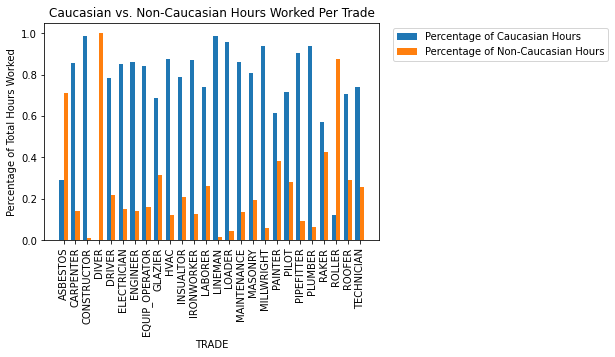

In [51]:
bar_width = 0.35
index = np.arange(26)

fig, ax = plt.subplots()
white = ax.bar(index, non_white['CAUCASION HOURS'], bar_width,
                label="Percentage of Caucasian Hours")

nonwhite = ax.bar(index+bar_width, non_white['NON-CAUCASIAN HOURS'],
                 bar_width, label="Percentage of Non-Caucasian Hours")

ax.set_xlabel('TRADE')
ax.set_ylabel('Percentage of Total Hours Worked')
ax.set_title('Caucasian vs. Non-Caucasian Hours Worked Per Trade')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(non_white['TRADE'])
ax.legend(bbox_to_anchor=(1.7, 1), loc='upper right')
plt.xticks(rotation=90)
figure(num=1, figsize=(50, 100), dpi=640)
plt.savefig('White_vs_NonWhite_Hours_Per_Trade.png')
plt.show()

<Figure size 432x288 with 0 Axes>